# Combining Sampling Methods with Attractor Dynamics in Spiking Models of Head-Direction Systems
## by Vojko Pjanovic, Jacob Zavatone-Veth, Paul Masset, Sander Keemink & Michele Nardin. 

Code written by Vojko Pjanovic and Michele Nardin.

This notebook includes the code for Fig. 2 panels B, C, D, E

## Panel B

Plotting the green attractor for illustrative purpose

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage as ndi

from funcs import run_simulation

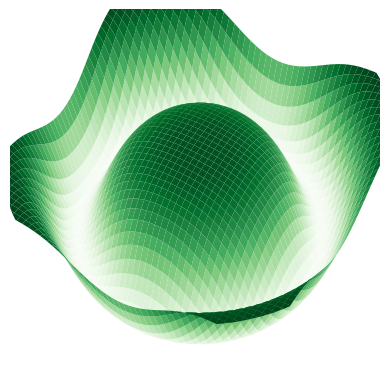

In [2]:
x , y = np.linspace(-2,2,1000), np.linspace(-2,2,1000)
X, Y = np.meshgrid(x,y)
r = 1.6
Z = -np.exp(-0.5*(X**2 + Y**2)*(X**2 + Y**2 - 2*r**2))
Z[Z>-0.1] = np.nan


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap = 'Greens', alpha = 1, rasterized=True)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.axis('off')

ax.view_init(60, 30)

# plt.savefig('3dplot_deeper_green.pdf', dpi=300)

plt.show()

## Panel C

In [17]:
# initialize parameters and variables
np.random.seed(0)
dt = 0.0005
radius = 4
nt=20000
K = 2
N = 8
lam = 10
Nr = 20
beta_scale = 50 

D = np.array([[np.sin(2*np.pi/N*i),np.cos(2*np.pi/N*i)] for i in range(N)])/4

ang_vel=np.concatenate([[np.random.randn()]*2000 for _ in range(int((nt+1)/2000))])*0.005
ang_vel = ndi.gaussian_filter1d(ang_vel,500,axis=0)

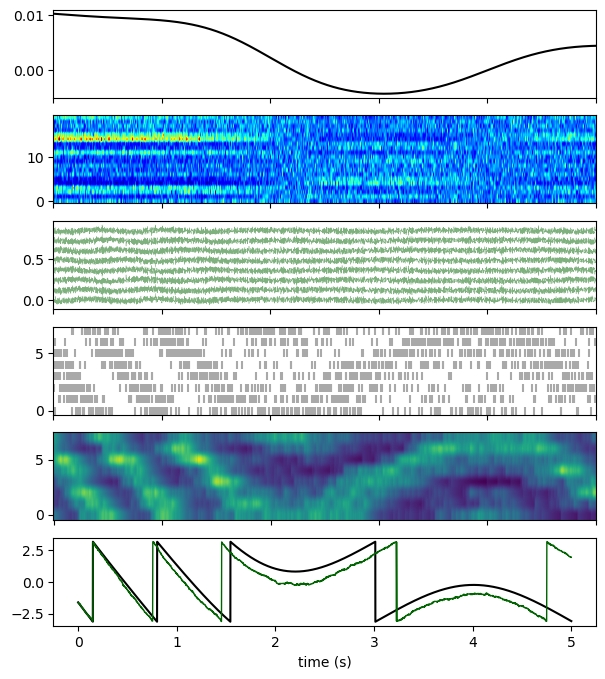

In [20]:
V, r, s, sigma, angle_est, angle_real, ang_vel, x_y_est = run_simulation(N, K, nt, lam, D, Nr, radius, ang_vel, beta_scale, dt, seed=42)

beg,end = 8000,13000

plt.figure(figsize=(7,8))

plt.subplot(611)

plt.plot(ang_vel[beg:end],'k')
plt.xticks(np.arange(0,end-beg+1000,1000),[])
plt.xlim(0,end-beg)

plt.subplot(612)
plt.imshow(s[:,beg:end], aspect='auto',cmap='jet', origin='lower', vmax=4)
plt.xticks(np.arange(0,end-beg+1000,1000),[])
plt.xlim(0,end-beg)

plt.subplot(613)
# plot voltage traces, one on each line, from beg to end
for iv,v in enumerate(V):
    plt.plot(v[beg:end] + iv*0.12,color='darkgreen',alpha=0.5,lw=0.3)
plt.xticks(np.arange(0,end-beg+1000,1000),[])
plt.xlim(0,end-beg)

# plot sigma as in putting a small dot wherewer a spike occurs
plt.subplot(614)
x,y = np.where(sigma[:,beg:end])
plt.scatter(y,x,marker='|',rasterized=True, color='darkgrey')
plt.xticks(np.arange(0,end-beg+1000,1000),[])
plt.xlim(0,end-beg)

plt.subplot(615)
plt.imshow(r[:,beg:end],aspect='auto',origin='lower')
plt.xticks(np.arange(0,end-beg+1000,1000),[])

plt.subplot(616)
plt.plot(angle_real[beg:end],'k')
plt.xticks(np.arange(0,end-beg+1000,1000),np.arange(6))
plt.plot(angle_est[beg:end], color='darkgreen', lw=1)
plt.xlabel('time (s)')
plt.show()

# plt.plot(np.unwrap(angle_real[beg:end]),'k')
# plt.xticks(np.arange(0,end-beg+1000,1000),np.arange(6))
# plt.plot(np.unwrap(angle_est[beg:end]), color='darkgreen', lw=1)
# plt.xlabel('time (s)')
# plt.show()

# Panel D 

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as nd

# initialize parameters and variables
np.random.seed(12345)
dt = 0.001
radius = 5
nt= 20000
K = 2
N = 50
lam = 2

D = np.random.randn(N,K) 
D = D / np.linalg.norm(D,axis=0)

np.random.seed(0)
ang_vel=np.concatenate([[np.random.rand()+1]*1000 + [0]*1000 for _ in range(int((nt+1)/2000))])*0.005

In [ ]:
# run the network 50 times and average the results
Nr = 5000
beta_scale = 10

print(f'computed stuff, starting {Nr} w beta_scale {beta_scale} ')
ang_diffs = []
for _ in range(50):
    print(_,end=' ')
    if _ % 10 == 0 and _ > 0:
        print()
    V, r, s, sigma, angle_est, angle_real, ang_vel, x_y_est = run_simulation(N, K, nt, lam, D, Nr, radius, ang_vel, beta_scale, dt, seed = _)
    ang_diffs.append(np.abs(np.arctan2(np.sin(angle_est - angle_real),np.cos(angle_est - angle_real))))
ang_diffs_5000 = np.array(ang_diffs, copy=True)

# same as above, with fewer and noisier input neurons
Nr = 1000
beta_scale = 5
print(f'\n finished, starting next with {Nr} w beta_scale {beta_scale}')

ang_diffs = []
for _ in range(50):
    print(_,end=' ')
    if _ % 10 == 0 and _ > 0:
        print()
    V, r, s, sigma, angle_est, angle_real, ang_vel, x_y_est = run_simulation(N, K, nt, lam, D, Nr, radius, ang_vel, beta_scale, dt, seed = _)
    ang_diffs.append(np.abs(np.arctan2(np.sin(angle_est - angle_real),np.cos(angle_est - angle_real))))
ang_diffs_1000 = np.array(ang_diffs, copy=True)

computed stuff, starting 5000 w beta_scale 10 
0 1 2 3 4 5 6 7 8 9 10 
11 12 13 14 15 16 17 18 19 20 
21 22 23 24 25 26 27 28 29 30 
31 32 33 34 35 36 37 38 39 40 
41 42 43 44 45 46 47 48 49 
 finished, starting next with 1000 w beta_scale 5
0 1 2 3 4 5 6 7 8 9 10 
11 12 13 14 15 16 17 18 19 20 
21 22 23 24 25 26 27 28 29 30 
31 32 33 34 35 36 37 38 39 40 
41 42 43 44 45 46 47 48 49 

(0.0, 2.05)

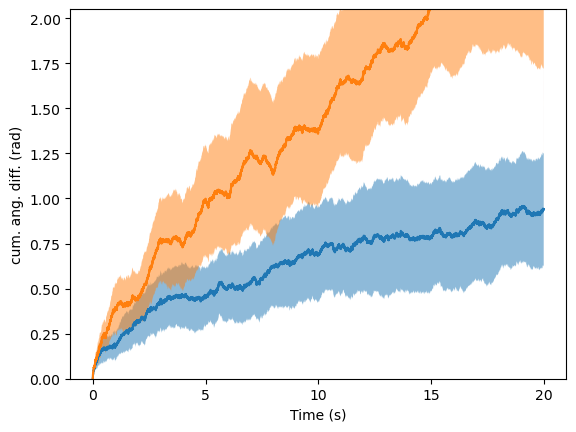

In [72]:
plt.plot(np.mean(ang_diffs_5000,axis=0)[:-1])
plt.fill_between(range(nt),np.mean(ang_diffs_5000,axis=0)-np.std(ang_diffs_5000,axis=0)/2,np.mean(ang_diffs_5000,axis=0)+np.std(ang_diffs_5000,axis=0)/2,alpha=0.5)

plt.plot(np.mean(ang_diffs_1000,axis=0)[:-1])
plt.fill_between(range(nt),np.mean(ang_diffs_1000,axis=0)-np.std(ang_diffs_1000,axis=0)/2,np.mean(ang_diffs_1000,axis=0)+np.std(ang_diffs_1000,axis=0)/2,alpha=0.5)

plt.xticks([0,5000,10000,15000,20000,],['0','5','10','15','20',])
plt.xlabel('Time (s)')
plt.ylabel('cum. ang. diff. (rad)')
plt.ylim([0,2.05])